In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
# %matplotlib inline

In [2]:
digits = load_digits()

In [3]:
dir(load_digits())

['DESCR', 'data', 'images', 'target', 'target_names']

In [4]:
from sklearn.model_selection import train_test_split

X_train , X_test , Y_train , Y_test = train_test_split(digits.data , digits.target , test_size = 0.3 , random_state = 0)

In [5]:
print(f"len_of_X_train:{len(X_train)}\nlen_of_X_test{len(X_test)}\nlen_of_Y_train{len(Y_train)}\nlen_of_Y_test{len(Y_test)}")

len_of_X_train:1257
len_of_X_test540
len_of_Y_train1257
len_of_Y_test540


In [6]:
from sklearn.preprocessing import StandardScaler
st = StandardScaler()
X_train = st.fit_transform(X_train)
X_test = st.transform(X_test)

In [7]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
classifier.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [8]:
y_pred = classifier.predict(X_test)

In [9]:
classifier.score(X_test,Y_test)*100

95.92592592592592

In [10]:
from sklearn.metrics import confusion_matrix , accuracy_score

In [11]:
cm = confusion_matrix(Y_test,y_pred)
ac = accuracy_score(Y_test,y_pred)*100

In [12]:
print(f"Confusion Matrix:\n{cm}\n\nAccuracy Score:\n{ac}")

Confusion Matrix:
[[45  0  0  0  0  0  0  0  0  0]
 [ 0 48  0  0  0  0  1  0  2  1]
 [ 0  2 50  1  0  0  0  0  0  0]
 [ 0  0  0 53  0  0  0  0  1  0]
 [ 0  0  0  0 48  0  0  0  0  0]
 [ 0  0  0  0  0 53  1  0  0  3]
 [ 0  1  0  0  0  0 59  0  0  0]
 [ 0  0  0  0  1  0  0 52  0  0]
 [ 0  3  1  0  0  0  0  0 55  2]
 [ 0  0  0  1  0  1  0  0  0 55]]

Accuracy Score:
95.92592592592592


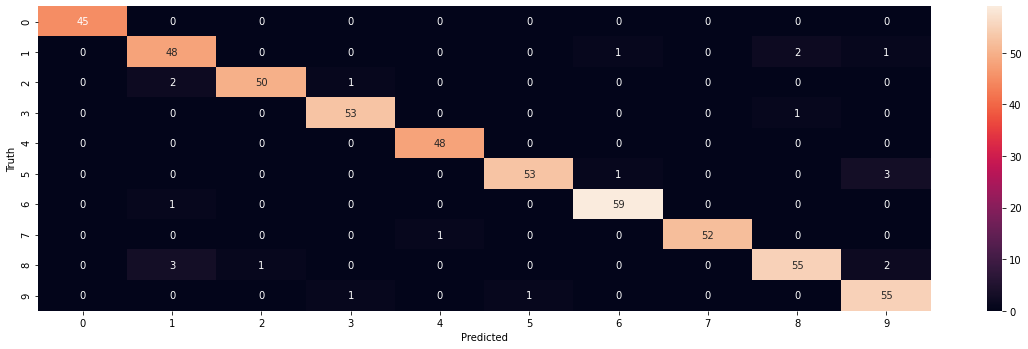

In [13]:
import seaborn as sb
plt.figure(figsize=(20,5.6))
sb.heatmap(cm ,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()